In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [67]:
import keras

In [79]:
df = pd.read_csv("updated_signal.csv")


In [80]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,input_data,output_data,received_data_real,received_data_imag,transmitted_data_real,transmitted_data_imag,encoded_data_real,encoded_data_imag
0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,23,23,165,162,-1.099938,0.032600,1.005887,0.008205,1.414214,-1.414214
2,29,29,168,162,-0.111939,-0.345232,-0.084933,0.102517,1.414214,1.414214
3,30,30,41,36,0.048014,0.193218,-0.649755,0.174344,1.414214,1.414214
4,35,35,30,36,0.700004,1.254664,0.082843,0.312132,1.414214,1.414214
5,60,60,238,246,0.167347,-0.958249,-1.010805,0.811226,1.414214,-1.414214
6,75,75,95,91,1.483420,-0.663337,-0.913666,0.238490,-1.414214,1.414214
7,113,113,87,88,-0.207286,0.896369,-0.075678,0.244347,1.414214,1.414214
8,115,115,96,88,0.044824,-1.717046,0.440569,0.001306,-1.414214,1.414214
9,151,151,175,167,0.322875,0.339851,-0.144661,0.363579,-1.414214,-1.414214


In [82]:
df.drop('Unnamed: 0.1', inplace=True, axis=1)
#df.drop('Unnamed: 0', inplace=True, axis=1)

In [83]:
df["input_data"].max()   # finding max for normalising

254

In [84]:
df["output_data"].max() # finding max for normalising

251

In [85]:
scale = StandardScaler()
df = scale.fit_transform(df)

In [86]:

df = pd.DataFrame(df)

In [87]:
df.describe()

,0,1,2,3,4,5,6,7
count,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03
mean,-4.961891e-18,1.606889e-16,-1.415411e-18,-1.145052e-18,6.218267e-18,4.246233e-18,-2.208677e-16,5.006420e-16
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-1.838735e+00,-1.844318e+00,-3.801324e+00,-3.736527e+00,-4.127746e+00,-3.811691e+00,-9.782483e-01,-9.372868e-01
25%,-8.344165e-01,-8.130780e-01,-6.130495e-01,-6.480501e-01,-5.857500e-01,-5.954422e-01,-9.782483e-01,-9.372868e-01
50%,-2.346151e-01,-1.859727e-01,1.213949e-02,-1.855561e-02,-1.649315e-02,8.617117e-04,-9.782483e-01,-9.372868e-01
75%,9.091921e-01,9.149455e-01,5.981062e-01,6.257851e-01,6.127126e-01,5.956339e-01,1.022382e+00,1.067063e+00
max,1.704278e+00,1.653536e+00,4.589705e+00,3.935213e+00,4.215901e+00,4.323131e+00,1.022382e+00,1.067063e+00


In [88]:
df.columns = ["input_data","output_data","received_data_real","received_data_imag","transmitted_data_real","transmitted_data_imag","encoded_data_real","encoded_data_imag"]

In [89]:
df

,input_data,output_data,received_data_real,received_data_imag,transmitted_data_real,transmitted_data_imag,encoded_data_real,encoded_data_imag
0,-1.838735,-1.844318,-0.013467,-0.007984,-0.016493,-0.027450,0.022067,0.064888
1,0.462828,0.413261,-1.781933,0.043214,2.298554,-0.008303,1.022382,-0.937287
2,0.504675,0.413261,-0.193441,-0.550169,-0.211967,0.211791,1.022382,1.067063
3,-1.266831,-1.342634,0.063729,0.295463,-1.511904,0.379411,1.022382,1.067063
4,-1.420269,-1.342634,1.111990,1.962457,0.174169,0.700963,1.022382,1.067063
...,...,...,...,...,...,...,...,...
6976,1.592687,1.555986,-0.307491,1.117431,-1.311161,-0.712229,-0.978248,1.067063
6977,1.550840,1.555986,-0.184974,0.435642,-0.231801,0.376838,-0.978248,1.067063
6978,0.365186,0.385390,-1.542985,-1.534749,-1.130126,0.035491,-0.978248,-0.937287
6979,-0.499644,-0.617979,-1.286643,-1.039211,-1.766088,-0.536508,-0.978248,1.067063


In [90]:
from sklearn.model_selection import train_test_split

In [162]:
X = df[["input_data","received_data_real","received_data_imag","transmitted_data_real","transmitted_data_imag","encoded_data_real","encoded_data_imag"]]
y = df[["output_data"]]

In [163]:
 X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

 

In [164]:
from keras.models import Sequential
from keras.layers import Dense

In [165]:
model = Sequential()

In [166]:
model.add(Dense(units = 4, activation = 'relu', input_dim = 7))
model.add(Dense(units = 4,  activation = 'relu'))
model.add(Dense(units = 1,  activation = 'linear'))

In [167]:

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [168]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [169]:
hist = model.fit(X_train, y_train,validation_split=0.125, batch_size = 10, epochs = 20)

Epoch 1/20
489/489 [==============================] - 1s 1ms/step - loss: 0.6109 - mse: 0.6109 - mae: 0.6344 - val_loss: 0.1628 - val_mse: 0.1628 - val_mae: 0.3141
Epoch 2/20
489/489 [==============================] - 1s 1ms/step - loss: 0.1230 - mse: 0.1230 - mae: 0.2671 - val_loss: 0.0577 - val_mse: 0.0577 - val_mae: 0.1814
Epoch 3/20
489/489 [==============================] - 1s 1ms/step - loss: 0.0496 - mse: 0.0496 - mae: 0.1681 - val_loss: 0.0281 - val_mse: 0.0281 - val_mae: 0.1246
Epoch 4/20
489/489 [==============================] - 1s 1ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.1135 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0910
Epoch 5/20
489/489 [==============================] - 1s 1ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0886 - val_loss: 0.0088 - val_mse: 0.0088 - val_mae: 0.0728
Epoch 6/20
489/489 [==============================] - 1s 1ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0737 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0663
Epoch 7/20
489/4

In [175]:
y_pred = model.predict(X_test)

In [176]:
scores = model.evaluate(X_test, y_test, verbose=0)


In [177]:
scores

[0.00501980958506465, 0.00501980958506465, 0.059462256729602814]

In [178]:
import matplotlib.pyplot as plt

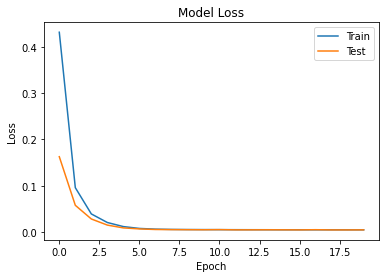

In [181]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()